In [1]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#data collection
data=pd.read_excel(r'C:\Users\ASUS\Desktop\MajorWineQuality.xlsx')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [6]:
data.shape

(1599, 12)

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [8]:
#checking for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [9]:
data=data.dropna()

In [10]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


In [12]:
#DataAnalysis and DataVisualization
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.321366,0.527666,0.271128,2.536936,0.087487,15.882206,46.431078,0.996745,3.498716,0.658189,10.424217,5.636591
std,1.742121,0.179154,0.194847,1.408341,0.047107,10.467380,32.893072,0.001889,0.080297,0.169587,1.066046,0.807963
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997842,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


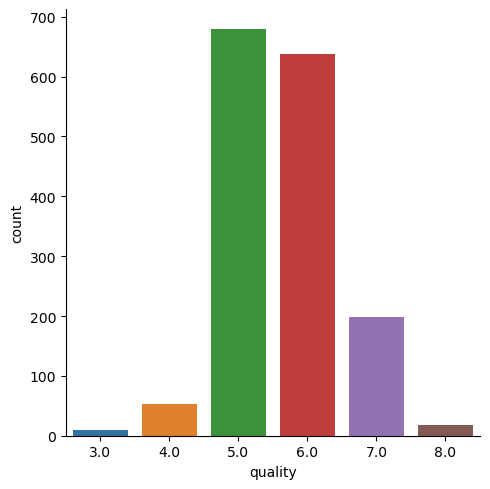

In [13]:
#no of values for each quality
sns.catplot(x='quality', data=data, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

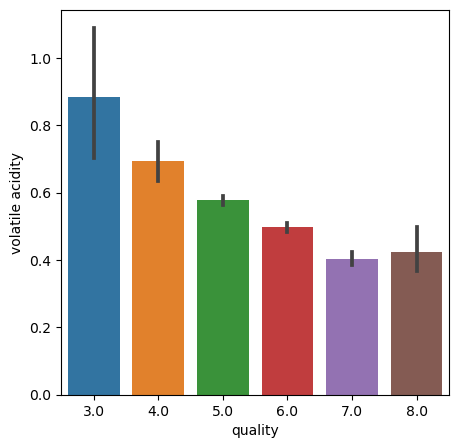

In [14]:
#volatile acidity vs Quality 
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity',data=data)

<Axes: xlabel='quality', ylabel='citric acid'>

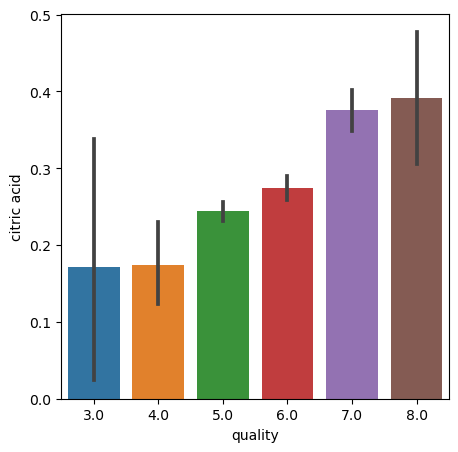

In [15]:
#citric acid vs Quality 
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid',data=data)

<Axes: xlabel='quality', ylabel='fixed acidity'>

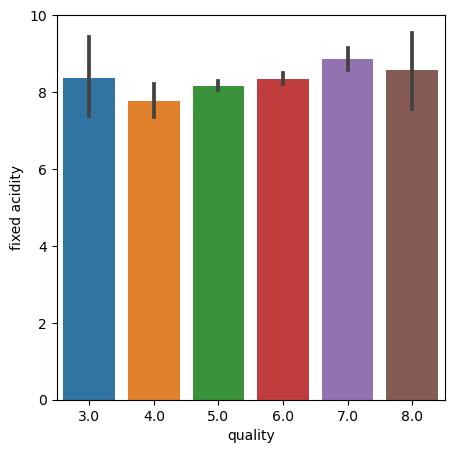

In [16]:
#fixed acidity vs Quality 
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='fixed acidity',data=data)

<Axes: xlabel='quality', ylabel='residual sugar'>

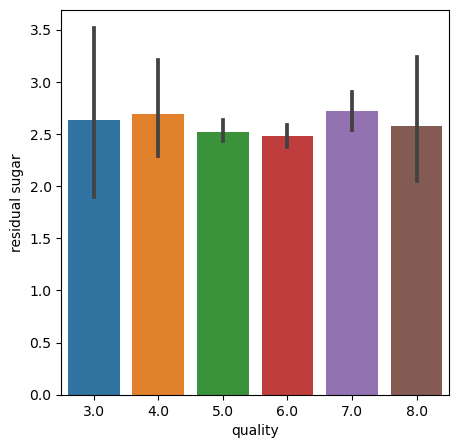

In [17]:
#residual sugar vs Quality 
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar',data=data)

<Axes: xlabel='quality', ylabel='chlorides'>

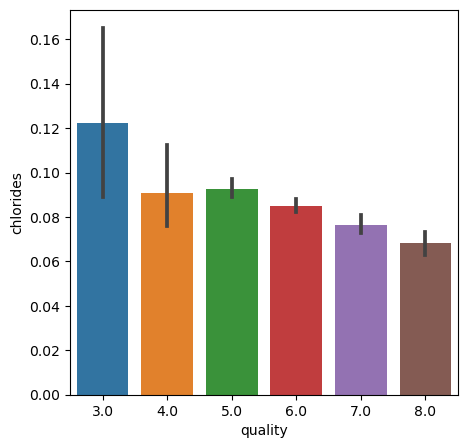

In [18]:
#chlorides vs Quality 
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='chlorides',data=data)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

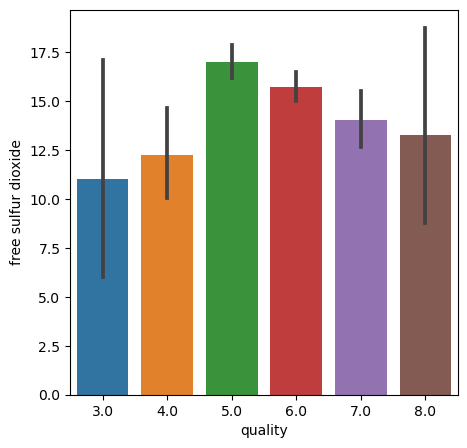

In [19]:
#free sulfur dioxide vs Quality 
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='free sulfur dioxide',data=data)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

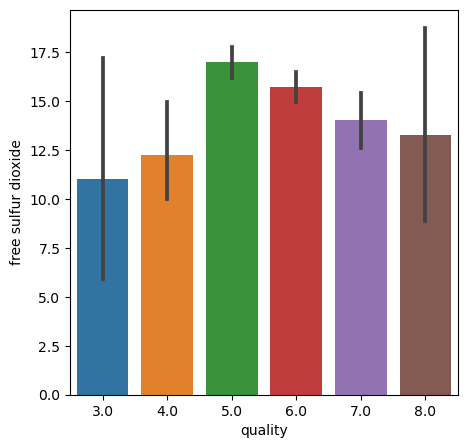

In [20]:
#total sulfur dioxide vs Quality 
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='free sulfur dioxide',data=data)

<Axes: xlabel='quality', ylabel='density'>

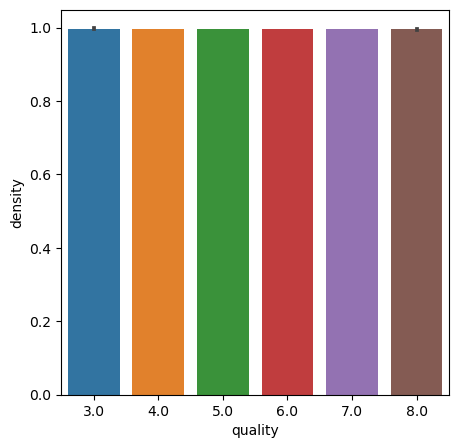

In [21]:
#density vs Quality 
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='density',data=data)

<Axes: xlabel='quality', ylabel='pH'>

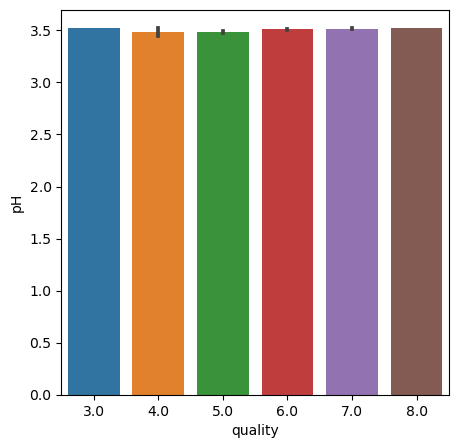

In [22]:
#pH acidity vs Quality 
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='pH',data=data)

<Axes: xlabel='quality', ylabel='sulphates'>

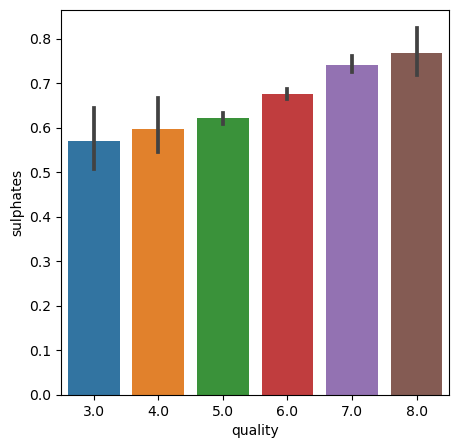

In [23]:
#sulphates vs Quality 
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='sulphates',data=data)

<Axes: xlabel='quality', ylabel='alcohol'>

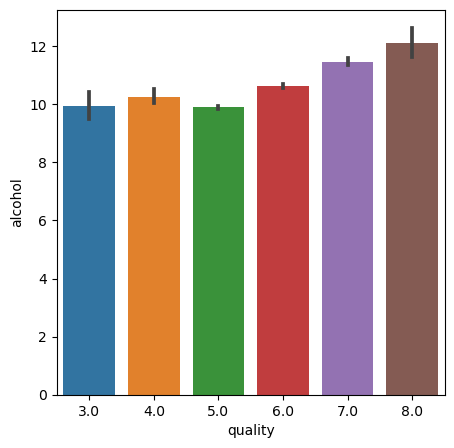

In [24]:
#alcohol vs Quality 
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='alcohol',data=data)

In [25]:
#finding correlation
correlation = data.corr()

In [26]:
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255955,0.672203,0.115542,0.093517,-0.154348,-0.112605,0.668689,0.026958,0.183046,-0.062419,0.124090
volatile acidity,-0.255955,1.000000,-0.552080,0.002286,0.061452,-0.009960,0.076832,0.021761,-0.046243,-0.260504,-0.201591,-0.390616
citric acid,0.672203,-0.552080,1.000000,0.143201,0.203904,-0.061621,0.034873,0.365526,0.008324,0.312146,0.109062,0.226261
residual sugar,0.115542,0.002286,0.143201,1.000000,0.056236,0.187112,0.201120,0.355219,0.043099,0.004105,0.041798,0.015165
chlorides,0.093517,0.061452,0.203904,0.056236,1.000000,0.005456,0.047837,0.200860,-0.259456,0.371510,-0.221472,-0.129172
free sulfur dioxide,-0.154348,-0.009960,-0.061621,0.187112,0.005456,1.000000,0.668505,-0.021797,-0.025512,0.051200,-0.070222,-0.050656
total sulfur dioxide,-0.112605,0.076832,0.034873,0.201120,0.047837,0.668505,1.000000,0.070830,-0.162984,0.042082,-0.205951,-0.184857
density,0.668689,0.021761,0.365526,0.355219,0.200860,-0.021797,0.070830,1.000000,-0.037144,0.148561,-0.496244,-0.174567
pH,0.026958,-0.046243,0.008324,0.043099,-0.259456,-0.025512,-0.162984,-0.037144,1.000000,-0.260327,0.233510,0.133216
sulphates,0.183046,-0.260504,0.312146,0.004105,0.371510,0.051200,0.042082,0.148561,-0.260327,1.000000,0.092940,0.251798


<Axes: >

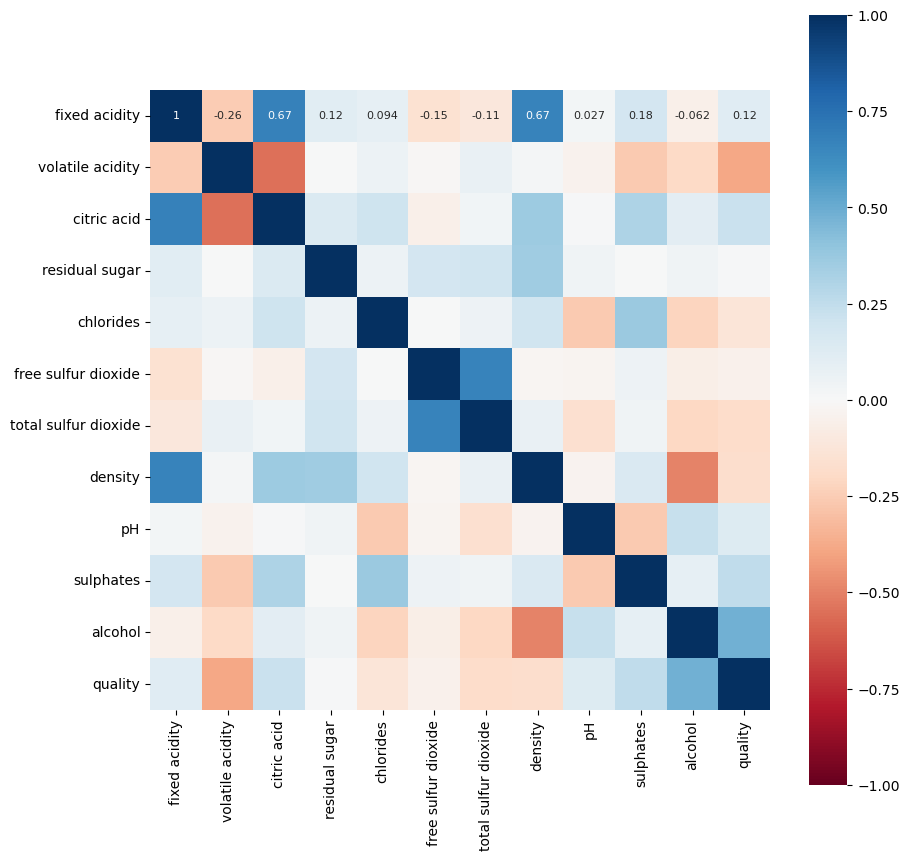

In [28]:
#constructing a heatmap to understand the correlation between thee coloumns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cmap = 'RdBu', cbar=True, square=True, vmin=-1 , vmax=1, annot =True, annot_kws = {'size':8})

In [29]:
#Data Preprocessing
#Separate the data and label
X=data.drop('quality', axis=1)

In [31]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [34]:
#Label Binarization
Y= data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [35]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1596, dtype: int64

In [36]:
#Training and Testing Data
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1596,) (1276,) (320,)


In [38]:
print(X.shape, X_test.shape, X_test.shape)

(1596, 11) (320, 11) (320, 11)


In [39]:
#Model Training
#Random Forest Classifier
model= RandomForestClassifier()

In [40]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [41]:
#Model Evaluation
#Accuracy Score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [42]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.875


In [46]:
#Building a predicting system
input_data = (7.4,0.7,0,1.9,0.076,11,3.4,0.9978,3.51,0.56,9.4)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[0]
Bad Quality Wine


C:\Users\ASUS\Downloads\anacond\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
